In [1]:
# Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
# File to Load
file_path = "./Data/final_dataset.csv"

# Read file into Pandas DataFrame
air_data = pd.read_csv(file_path)

col_list = ["air_carrier_delay","weather_delay","national_aviation_system_delay",
            "sercurity_delay","aircraft_arriving_late","flight_cancelled","flight_diverted"]


air_data['delay_sum'] = air_data[col_list].sum(axis=1)
air_data.head()

,year,month,carrier_name,airport_abbr,airport_name,city,state,total_number_flights,air_carrier_delay,weather_delay,national_aviation_system_delay,sercurity_delay,aircraft_arriving_late,flight_cancelled,flight_diverted,delay_sum
0,2018,September,Frontier Airlines Inc.,PBI,Palm Beach International Airport,West Palm Beach,FL,8.0,0.85,0.00,0.49,0.0,1.65,0.0,0.0,2.99
1,2018,September,Envoy Air,PBI,Palm Beach International Airport,West Palm Beach,FL,25.0,0.00,0.00,2.00,0.0,1.00,0.0,0.0,3.00
2,2018,September,United Air Lines Inc.,PBI,Palm Beach International Airport,West Palm Beach,FL,114.0,6.97,0.01,7.65,0.0,5.37,0.0,0.0,20.00
3,2018,September,Southwest Airlines Co.,PBI,Palm Beach International Airport,West Palm Beach,FL,143.0,8.14,0.00,1.49,0.0,15.36,0.0,1.0,25.99
4,2018,September,Endeavor Air Inc.,PBI,Palm Beach International Airport,West Palm Beach,FL,3.0,0.68,0.00,0.32,0.0,0.00,0.0,0.0,1.00


In [3]:
# Add all delayed columns to get total number of delayed flights and subtract that from "total_number_flights" to get on time flights

# Create list of columns you want to add
col_list = ["air_carrier_delay","weather_delay","national_aviation_system_delay",
            "sercurity_delay","aircraft_arriving_late","flight_cancelled","flight_diverted"]

delay_type = pd.DataFrame(air_data[col_list].sum(axis=0))

delay_type = delay_type.reset_index()
delay_type = delay_type.rename(columns = {'index':'delay_type'})

delay_type


,delay_type,0
0,air_carrier_delay,407869.73
1,weather_delay,51321.87
2,national_aviation_system_delay,479101.11
3,sercurity_delay,2767.63
4,aircraft_arriving_late,539121.24
5,flight_cancelled,144861.00
6,flight_diverted,20535.00


In [4]:
air_data.columns

Index(['year', 'month', 'carrier_name', 'airport_abbr', 'airport_name', 'city',
       'state', 'total_number_flights', 'air_carrier_delay', 'weather_delay',
       'national_aviation_system_delay', 'sercurity_delay',
       'aircraft_arriving_late', 'flight_cancelled', 'flight_diverted'],
      dtype='object')

/Users/aracelyvivanco/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  # This is added back by InteractiveShellApp.init_path()


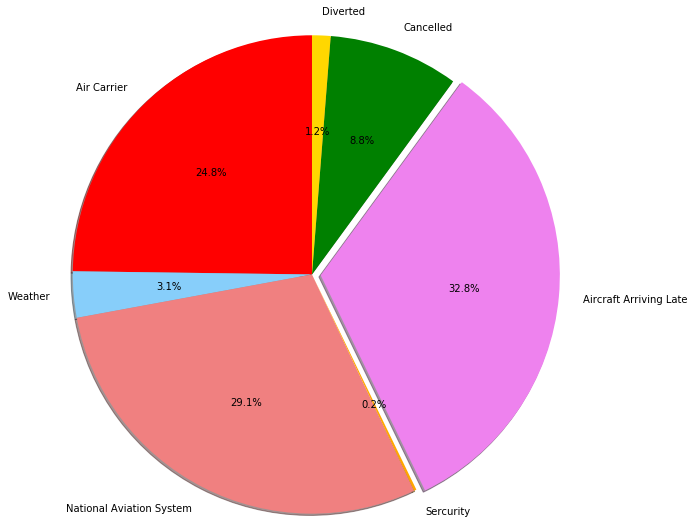

In [18]:
# Create sizes and labels for the pie chart
sizes = delay_type[0]
labels = ["Air Carrier","Weather","National Aviation System","Sercurity","Aircraft Arriving Late","Cancelled",
          "Diverted"]
colors = ["red", "lightskyblue", "lightcoral", "orange", "violet", "g", "gold"]
explode = [0,0,0,0,0.1,0,0]

# Piechart of delay types
plt.pie(sizes, colors=colors, labels=labels, explode=explode, autopct="%1.1f%%", shadow = True, 
        radius = 2.75, startangle = 90, pctdistance = 0.6)
plt.tight_layout()

#Save fig
plt.savefig("Type_Delayed_Flights.png")

In [11]:
# Group by airport name
airport_groups = air_data.groupby(['airport_name'])['delay_sum','total_number_flights']
airport_delays = airport_groups.sum()

airport_df = airport_delays.reset_index()
airport_df.head()

,airport_name,delay_sum,total_number_flights
0,Aberdeen Regional Airport,112.01,808.0
1,Abilene Regional Airport,498.96,2371.0
2,Abraham Lincoln Capital Airport,464.05,1898.0
3,Adak Airport,16.00,113.0
4,Akron-Canton Airport,2054.05,7353.0


In [15]:
sorted_airport_df = airport_df.sort_values('total_number_flights', ascending=False)

Top25_delay_df = sorted_airport_df.nlargest(25, 'total_number_flights')
Top25_delay_df.reset_index(drop=True)
Top25_delay_df["perc_delay"]= Top25_delay_df["delay_sum"]/Top25_delay_df["total_number_flights"]
Top25_delay_df["avg_perc_delay"] = air_data["delay_sum"].sum()/air_data["total_number_flights"].sum()

Top25_delay_df.head()

,airport_name,delay_sum,total_number_flights,perc_delay,avg_perc_delay
15,Atlanta International Airport,65842.93,425255.0,0.154832,0.208236
63,Chicago O'hare International Airport,92928.02,367499.0,0.252866,0.208236
77,Dallas/Fort Worth International Airport,76313.98,319212.0,0.239070,0.208236
84,Denver International Airport,54852.87,265815.0,0.206357,0.208236
57,Charlotte/Douglas International Airport,46262.06,253116.0,0.182770,0.208236


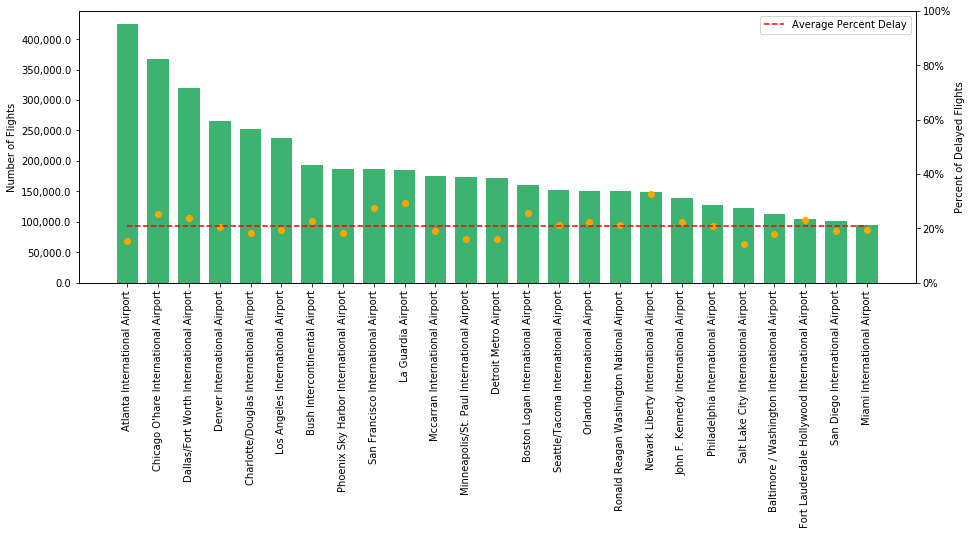

In [17]:
# Create bar chart of the 25 airport with the most flights and plot the percent of delays they had along with thw average

x_axis = Top25_delay_df["airport_name"]
y_axis = Top25_delay_df["total_number_flights"]
y2_axis = Top25_delay_df["perc_delay"]
avg_perc_delay = Top25_delay_df["avg_perc_delay"]

fig = plt.figure(figsize=(15,5))
bar_graph = fig.add_subplot(111)
bar_graph.bar(x_axis, y_axis,color="mediumseagreen", align="center", width=.7)
bar_graph.set_ylabel('Number of Flights')
yvals_bar = bar_graph.get_yticks()
bar_graph.set_yticklabels(['{:,}'.format(x) for x in yvals_bar])

plt.xticks(rotation=90)

line_graph = bar_graph.twinx()
line_graph.plot(x_axis, y2_axis,'-o',color="orange", lw = 0)
line_graph.set_ylabel('Percent of Delayed Flights')
line_graph.set_ylim([0,1])
yvals_line = line_graph.get_yticks()
line_graph.set_yticklabels(['{:,.0%}'.format(x) for x in yvals_line])
line_graph.plot(x_axis, avg_perc_delay,'--',color="red",label='Average Percent Delay')


plt.legend()

#Save fig
plt.savefig("summary_airport_with_most_flights.png")
